In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle
import os
import joblib

In [41]:
data = pd.read_csv("https://raw.githubusercontent.com/oishbdh/Datasets/main/Heart_disease(Datasets)/heart.csv")

In [42]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [44]:
# Lets explore our datasets
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
#store a target in the dataset and give it a value count
data.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

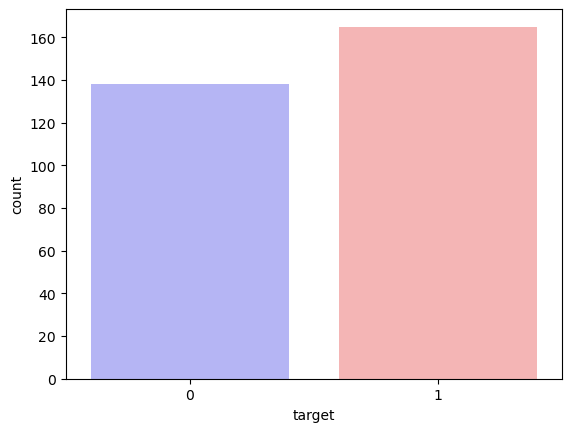

In [46]:
#ploting with the seaborn and setting its parameters
sns.countplot(x='target', data=data, palette='bwr')
plt.show

In [47]:
#Determing the patient with heard disease and the once without heart disease
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("The percentage of people with no disease: {:.2f}%".format((countNoDisease / (len(data.target)) * 100)))
print("The percentage of people living with heart disease: {:.2f}".format((countHaveDisease / (len(data.target)) * 100)))

The percentage of people with no disease: 45.54%
The percentage of people living with heart disease: 54.46


<function matplotlib.pyplot.show(close=None, block=None)>

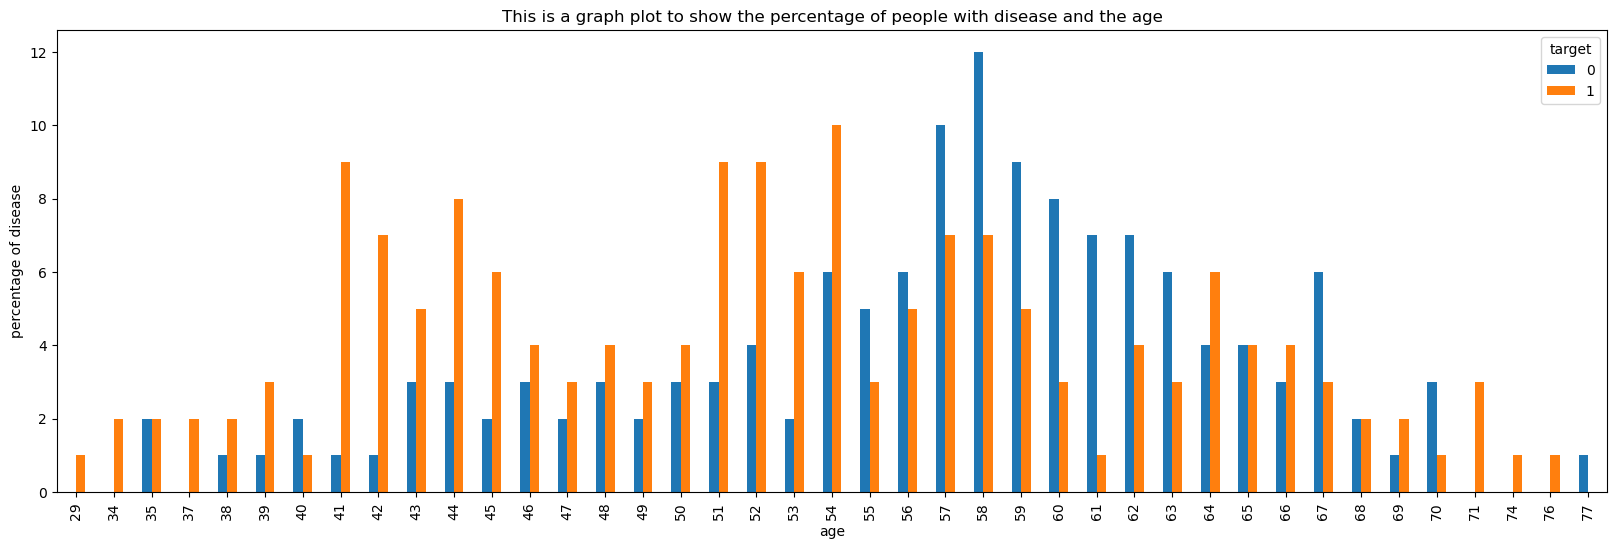

In [48]:
#A graph to show the percentage of people with diseases and their ages
pd.crosstab(data.age, data.target).plot(kind='bar', figsize=(20,6))
plt.title('This is a graph plot to show the percentage of people with disease and the age')
plt.xlabel('age')
plt.ylabel('percentage of disease')
plt.savefig('heartDiseaseAndAges.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

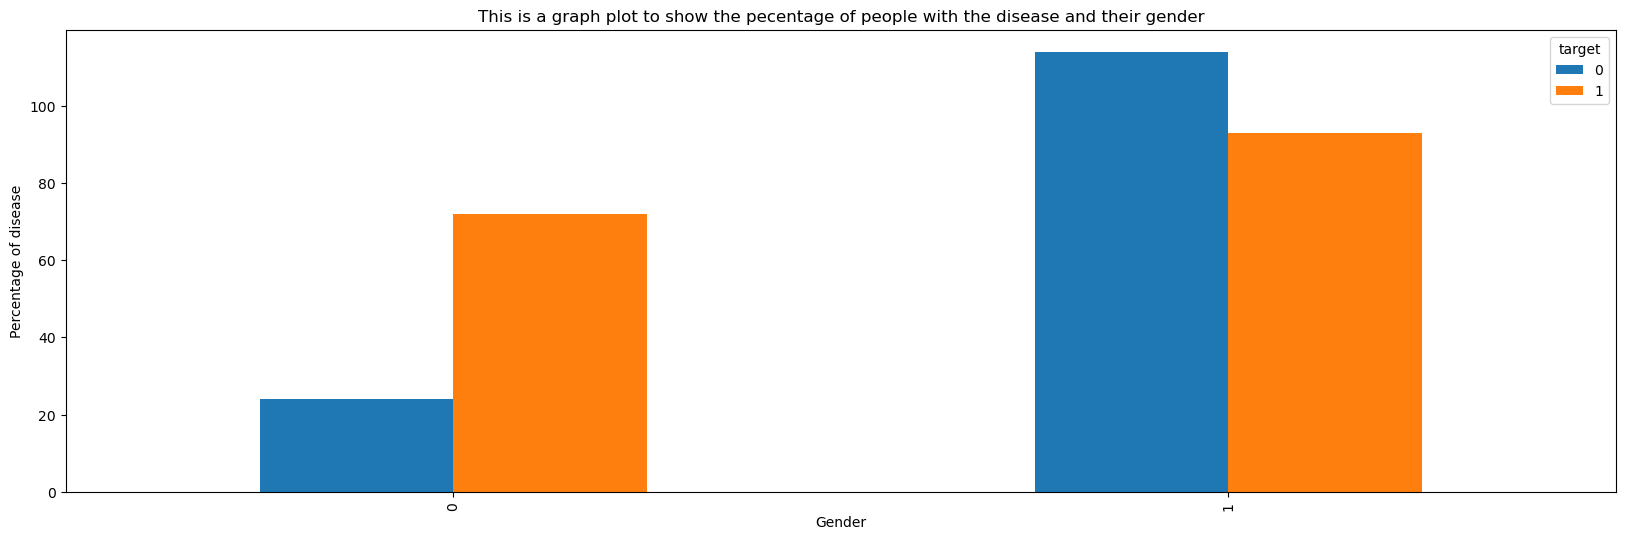

In [49]:
#plotting a graph to show the gender of people living with diseases
pd.crosstab(data.sex, data.target).plot(kind='bar', figsize=(20,6))
plt.title('This is a graph plot to show the pecentage of people with the disease and their gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of disease')
plt.show

In [50]:
#variables dummies
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

In [51]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,False,False,True,False,True,False,False,True,False,False
1,37,1,2,130,250,0,1,187,0,3.5,...,False,True,False,False,False,True,False,True,False,False
2,41,0,1,130,204,0,0,172,0,1.4,...,True,False,False,False,False,True,False,False,False,True
3,56,1,1,120,236,0,1,178,0,0.8,...,True,False,False,False,False,True,False,False,False,True
4,57,0,0,120,354,0,1,163,1,0.6,...,False,False,False,False,False,True,False,False,False,True


In [52]:
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,False,False,True,False,True,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,...,False,True,False,False,False,True,False,True,False,False
2,41,0,130,204,0,0,172,0,1.4,0,...,True,False,False,False,False,True,False,False,False,True
3,56,1,120,236,0,1,178,0,0.8,0,...,True,False,False,False,False,True,False,False,False,True
4,57,0,120,354,0,1,163,1,0.6,0,...,False,False,False,False,False,True,False,False,False,True


In [53]:
#model regression logistics
y = data.target.values
x_data = data.drop(['target'], axis = 1)

In [54]:
x = (x_data -np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [55]:
#Time to train and test our model
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [56]:
#Transpose Matrices

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [57]:
def initialize_test(dimension):
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight, bias

In [58]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [59]:
def forwardBackward(weight, bias, x_train, y_train):
    #Forward
    y_head = sigmoid(np.dot(weight.T, x_train) + bias)
    loss = -(y_train * np.log(y_head) + (1 - y_train) * np.log(1 - y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    #Backward
    derivative_weight = np.dot(x_train,((y_head - y_train).T)) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    #return the forward and backward variables
    return cost, gradients

In [60]:
def update(weight, bias, x_train, y_train, learningRate, iteration):
    costList = []
    index = []
    
    #Models should be able to update weight and bias value for each iteration
    for i in range(iteration):
        cost, gradients = forwardBackward(weight, bias, x_train, y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        costList.append(cost)
        index.append(i)
        parameters = {"Weight": weight,"Bias": bias}
        print("iteration: ", iteration)
        print("cost: ", cost)
        
        plt.plot(index, costList)
        plt.xlabel("Number of iteration")
        plt.ylabel("Cost")
        plt.show
        
        return parameters, gradients

In [61]:
#Lets predict our model
def predict(weight, bias, x_test):
    z = np.dot(weight.T, x_test) + bias
    y_head = sigmoid(z)
    
    y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head(0,i) <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
        return y_prediction
                

In [62]:
#Setting accuracies of model during prediction
#Defining our models from scikit learn models
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T) * 100


accuracies['LogisticRegression'] = acc
print("Test Accuracy {:.2f}%" .format(acc))

Test Accuracy 62.30%


In [63]:
def logistic_regression(x_train, y_train, x_test, y_test, learningRate, iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize_test(dimension)
    
    parameters, gradients = update(weight, bias, x_train, y_train, learningRate, iteration)
    y_prediction = y_prediction = predict(parameters["weight"],parameters["bias"], x_test)
    print("Manual Test Accuracy {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test)) * 100)))

In [64]:
#logistic_regression(x_train, y_train, x_test, y_test, 1, 100)

In [65]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T) * 100
accuracies['LogisticRegression'] = acc
print("Test Accuracy {:.2f}".format(acc))

Test Accuracy 62.30


In [66]:
import pickle

In [96]:
#Save file in write binary mode
datas = {"model": lr, "frames": frames, "x": x }
model_filename = "Heart_Disease.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(datas, file)

In [97]:
#view saved file in read binary mode
with open(model_filename, "rb") as file:
    datas = pickle.load(file)
    
lr_loaded = datas["model"]
frames = datas["frames"]
x = datas["x"]

In [99]:
y_pred = lr_loaded.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,